# Detección de Contornos: Abriendo la Caja Negra

**Tecnicatura Superior en Ciencias de Datos e IA**  
*Procesamiento de Imágenes*

---

## Objetivos de Aprendizaje

- **Entender** qué hace cada módulo y por qué lo necesitamos
- **Descubrir** cómo funcionan los parámetros internamente
- **Explorar** los algoritmos detrás de la detección de contornos
- **Aplicar** conocimientos técnicos de forma creativa

## Filosofía del Cuaderno

No vamos a usar las herramientas "a ciegas". Como futuros científicos de datos, necesitamos entender **qué** hacemos, **cómo** lo hacemos, y **por qué** funciona.

---

## 1. Los Módulos: Conociendo a Nuestros Aliados

Antes de programar, vamos a entender qué herramientas estamos usando y por qué cada una es importante.

### OpenCV (cv2): El Especialista en Visión

**¿Qué es?** OpenCV es como un "microscopio digital" para imágenes.

**¿Por qué cv2?** Históricamente, cv2 era la versión 2 de OpenCV, pero el nombre se mantuvo aunque ahora estemos en versiones superiores.

**¿Qué hace internamente?**
- Convierte imágenes en matrices de números
- Aplica algoritmos matemáticos a esas matrices
- Optimiza operaciones para velocidad (usa C++ por debajo)

**En nuestro contexto:** Será nuestro "detective de contornos"

In [ ]:
import cv2

print(f"OpenCV importado - Versión: {cv2.__version__}")
print("Funciones que vamos a usar:")
print("   • cv2.findContours() - Encuentra los bordes")
print("   • cv2.contourArea() - Calcula áreas")
print("   • cv2.arcLength() - Calcula perímetros")
print("   • cv2.moments() - Extrae propiedades geométricas")
print("   • cv2.drawContours() - Dibuja resultados")

OpenCV importado - Versión: 4.12.0
Funciones que vamos a usar:
   • cv2.findContours() - Encuentra los bordes
   • cv2.contourArea() - Calcula áreas
   • cv2.arcLength() - Calcula perímetros
   • cv2.moments() - Extrae propiedades geométricas
   • cv2.drawContours() - Dibuja resultados


### NumPy (np): El Matemático Universal

**¿Qué es?** NumPy es como una "calculadora súper poderosa" para trabajar con listas gigantes de números.

**¿Por qué lo necesitamos?**
- Las imágenes son matrices de números (cada píxel es un número)
- NumPy maneja estas matrices de forma eficiente
- Permite operaciones matemáticas vectorizadas (muy rápidas)

**Dato técnico:** NumPy usa memoria contigua y operaciones en C, por eso es tan rápido.

In [ ]:
import numpy as np

print(f"NumPy importado - Versión: {np.__version__}")
print("Funciones que vamos a usar:")
print("   • np.zeros() - Crea matrices llenas de ceros")
print("   • np.array() - Convierte listas en arrays eficientes")
print("   • dtype=np.uint8 - Tipo de dato para imágenes (0-255)")

# Demostración práctica
ejemplo_pixel = np.array([255, 128, 0], dtype=np.uint8)
print(f"\nEjemplo: Un píxel RGB = {ejemplo_pixel}")
print(f"   Tipo de dato: {ejemplo_pixel.dtype}")
print(f"   Rango válido: 0 a {np.iinfo(np.uint8).max}")

NumPy importado - Versión: 2.0.2
Funciones que vamos a usar:
   • np.zeros() - Crea matrices llenas de ceros
   • np.array() - Convierte listas en arrays eficientes
   • dtype=np.uint8 - Tipo de dato para imágenes (0-255)

Ejemplo: Un píxel RGB = [255 128   0]
   Tipo de dato: uint8
   Rango válido: 0 a 255


### Matplotlib (plt): El Artista Visualizador

**¿Qué es?** Matplotlib es como un "pincel digital" que convierte números en imágenes que podemos ver.

**¿Por qué es crucial?**
- Las computadoras "ven" números, nosotros necesitamos imágenes
- Permite verificar visualmente que nuestros algoritmos funcionan
- Esencial para comunicar resultados

**Aspecto técnico:** Matplotlib interpreta matrices NumPy como mapas de colores.

In [ ]:
import matplotlib.pyplot as plt

print("Matplotlib importado")
print("Configuraciones que vamos a usar:")
print("   • cmap='gray' - Mapa de colores en escala de grises")
print("   • figsize=(w,h) - Tamaño de la figura en pulgadas")
print("   • axis('off') - Oculta los ejes numéricos")

# Configuración para mejor visualización
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 11
print("\nConfiguración optimizada para Jupyter")

Matplotlib importado
Configuraciones que vamos a usar:
   • cmap='gray' - Mapa de colores en escala de grises
   • figsize=(w,h) - Tamaño de la figura en pulgadas
   • axis('off') - Oculta los ejes numéricos

Configuración optimizada para Jupyter


## 2. Construyendo Nuestro Laboratorio Digital

Ahora vamos a crear una imagen controlada para experimentos. Es como preparar una muestra en un laboratorio.

### El Lienzo Digital: np.zeros()

**¿Qué hace realmente `np.zeros()`?**
- Reserva un bloque de memoria
- Lo llena completamente con ceros
- En términos de imagen: crea una "hoja negra"

**Los parámetros explicados:**

In [ ]:
# Creando nuestro lienzo digital
altura = 200    # Número de filas (píxeles de arriba a abajo)
ancho = 300     # Número de columnas (píxeles de izquierda a derecha)

imagen = np.zeros((altura, ancho), dtype=np.uint8)

print("Lienzo digital creado:")
print(f"   Dimensiones: {ancho} × {altura} píxeles")
print(f"   Forma de la matriz: {imagen.shape}")
print(f"   Tipo de dato: {imagen.dtype}")
print(f"   Memoria usada: {imagen.nbytes} bytes")

print("\nExplorando la estructura interna:")
print(f"   Valor mínimo: {imagen.min()} (negro absoluto)")
print(f"   Valor máximo: {imagen.max()} (debería ser 0 por ahora)")
print(f"   Número total de píxeles: {imagen.size}")

# Mostrar algunos valores de la esquina superior izquierda
print(f"\nMuestra de valores (esquina superior izquierda):")
print(imagen[0:3, 0:5])  # Primeras 3 filas, primeras 5 columnas

Lienzo digital creado:
   Dimensiones: 300 × 200 píxeles
   Forma de la matriz: (200, 300)
   Tipo de dato: uint8
   Memoria usada: 60000 bytes

Explorando la estructura interna:
   Valor mínimo: 0 (negro absoluto)
   Valor máximo: 0 (debería ser 0 por ahora)
   Número total de píxeles: 60000

Muestra de valores (esquina superior izquierda):
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


### 🎯 Entendiendo dtype=np.uint8

**¿Por qué uint8 y no otro tipo?**

- **uint** = "unsigned integer" (entero sin signo, solo positivos)
- **8** = 8 bits de información
- **Rango:** 0 a 255 (2^8 = 256 valores posibles)
- **Ventaja:** Estándar para imágenes, eficiente en memoria

**¿Qué significan los valores?**
- 0 = Negro absoluto
- 255 = Blanco absoluto
- 128 = Gris medio
- Todo valor intermedio = Diferentes tonos de gris

In [ ]:
# Demostración de valores de píxeles
print("🎨 Escala de grises - Valores y significados:")
valores_ejemplo = [0, 64, 128, 192, 255]
nombres = ['Negro', 'Gris oscuro', 'Gris medio', 'Gris claro', 'Blanco']

for valor, nombre in zip(valores_ejemplo, nombres):
    print(f"   {valor:3d} = {nombre}")

print("\n💾 Comparación de tipos de datos:")
print(f"   uint8:  0 a {np.iinfo(np.uint8).max} (1 byte por píxel)")
print(f"   uint16: 0 a {np.iinfo(np.uint16).max} (2 bytes por píxel)")
print(f"   float32: precisión decimal (4 bytes por píxel)")
print("\n💡 uint8 es el estándar porque balancea calidad y eficiencia")

🎨 Escala de grises - Valores y significados:
     0 = Negro
    64 = Gris oscuro
   128 = Gris medio
   192 = Gris claro
   255 = Blanco

💾 Comparación de tipos de datos:
   uint8:  0 a 255 (1 byte por píxel)
   uint16: 0 a 65535 (2 bytes por píxel)
   float32: precisión decimal (4 bytes por píxel)

💡 uint8 es el estándar porque balancea calidad y eficiencia


## 3. Dibujando con Matemática: cv2.fillPoly()

Ahora vamos a "dibujar" un objeto, pero entendiendo qué hace la computadora internamente.

### Definiendo Coordenadas: Sistema de Referencia

**¿Cómo funciona el sistema de coordenadas en imágenes?**

- **Origen (0,0):** Esquina superior izquierda (¡no como en matemática!)
- **Eje X:** Horizontal, crece hacia la derecha
- **Eje Y:** Vertical, crece hacia abajo
- **Formato:** (x, y) = (columna, fila)

In [ ]:
# Definiendo los vértices de nuestro polígono
print("Definiendo vértices del polígono:")
print("   Formato: [x, y] donde x=columna, y=fila")
print("   Recordar: origen (0,0) está arriba a la izquierda\n")

puntos = np.array([
    [50, 50],    # Vértice 1: cerca de la esquina superior izquierda
    [200, 70],   # Vértice 2: hacia la derecha, un poco más abajo
    [180, 150],  # Vértice 3: un poco a la izquierda, mucho más abajo
    [40, 120]    # Vértice 4: hacia la izquierda, arriba del vértice 3
], dtype=np.int32)

print("Vértices definidos:")
for i, (x, y) in enumerate(puntos, 1):
    print(f"   Vértice {i}: x={x:3d}, y={y:3d}")

print(f"\nInformación del array de puntos:")
print(f"   Forma: {puntos.shape} (4 puntos, 2 coordenadas cada uno)")
print(f"   Tipo: {puntos.dtype} (enteros de 32 bits)")

Definiendo vértices del polígono:
   Formato: [x, y] donde x=columna, y=fila
   Recordar: origen (0,0) está arriba a la izquierda

Vértices definidos:
   Vértice 1: x= 50, y= 50
   Vértice 2: x=200, y= 70
   Vértice 3: x=180, y=150
   Vértice 4: x= 40, y=120

Información del array de puntos:
   Forma: (4, 2) (4 puntos, 2 coordenadas cada uno)
   Tipo: int32 (enteros de 32 bits)


### 🔄 La Transformación Misteriosa: reshape(-1, 1, 2)

**¿Por qué OpenCV necesita esta forma específica?**

OpenCV espera contornos en formato: `[número_de_puntos, 1, 2]`

- **-1:** "Calculá automáticamente esta dimensión"
- **1:** Dimensión "dummy" por compatibilidad histórica
- **2:** Las dos coordenadas (x, y)

In [ ]:
print("🔄 Transformación de forma para OpenCV:")
print(f"   Forma original: {puntos.shape}")

# La transformación que OpenCV necesita
puntos_opencv = puntos.reshape((-1, 1, 2))
print(f"   Forma para OpenCV: {puntos_opencv.shape}")

print("\n🔍 Comparando las estructuras:")
print("   Original (más intuitivo):")
print(f"   {puntos[0]} <- Primer punto")
print(f"   {puntos[1]} <- Segundo punto")

print("\n   Formato OpenCV (con dimensión extra):")
print(f"   {puntos_opencv[0]} <- Primer punto")
print(f"   {puntos_opencv[1]} <- Segundo punto")

print("\n💡 La dimensión '1' del medio es por compatibilidad con versiones anteriores")
print("   Permite manejar contornos con 'huecos' internos")

🔄 Transformación de forma para OpenCV:
   Forma original: (4, 2)
   Forma para OpenCV: (4, 1, 2)

🔍 Comparando las estructuras:
   Original (más intuitivo):
   [50 50] <- Primer punto
   [200  70] <- Segundo punto

   Formato OpenCV (con dimensión extra):
   [[50 50]] <- Primer punto
   [[200  70]] <- Segundo punto

💡 La dimensión '1' del medio es por compatibilidad con versiones anteriores
   Permite manejar contornos con 'huecos' internos


### 🎨 El Algoritmo de Relleno: cv2.fillPoly()

**¿Cómo funciona internamente el algoritmo de relleno?**

1. **Scanline Algorithm:** Recorre línea por línea (fila por fila)
2. **Ray Casting:** Para cada píxel, "dispara" un rayo hacia la derecha
3. **Cuenta intersecciones:** Si es impar, está dentro; si es par, está fuera
4. **Rellena píxeles:** Los que están "dentro" se pintan del color especificado

In [ ]:
# Aplicando el algoritmo de relleno
print("🎨 Aplicando cv2.fillPoly():")
print("\n📋 Parámetros explicados:")
print("   imagen: El lienzo donde dibujar (se modifica in-place)")
print("   [puntos_opencv]: Lista de polígonos (podríamos tener varios)")
print("   255: Valor del color (blanco en escala de grises)")

# Guardamos el estado antes del relleno
pixeles_negros_antes = np.count_nonzero(imagen == 0)
pixeles_blancos_antes = np.count_nonzero(imagen == 255)

# ¡Aquí sucede la magia!
cv2.fillPoly(imagen, [puntos_opencv], 255)

# Analizamos qué cambió
pixeles_negros_despues = np.count_nonzero(imagen == 0)
pixeles_blancos_despues = np.count_nonzero(imagen == 255)

print("\n📊 Estadísticas del relleno:")
print(f"   Píxeles negros: {pixeles_negros_antes} → {pixeles_negros_despues}")
print(f"   Píxeles blancos: {pixeles_blancos_antes} → {pixeles_blancos_despues}")
print(f"   Píxeles modificados: {pixeles_blancos_despues - pixeles_blancos_antes}")
print(f"   Área del polígono: {pixeles_blancos_despues} píxeles²")

🎨 Aplicando cv2.fillPoly():

📋 Parámetros explicados:
   imagen: El lienzo donde dibujar (se modifica in-place)
   [puntos_opencv]: Lista de polígonos (podríamos tener varios)
   255: Valor del color (blanco en escala de grises)

📊 Estadísticas del relleno:
   Píxeles negros: 60000 → 48544
   Píxeles blancos: 0 → 11456
   Píxeles modificados: 11456
   Área del polígono: 11456 píxeles²


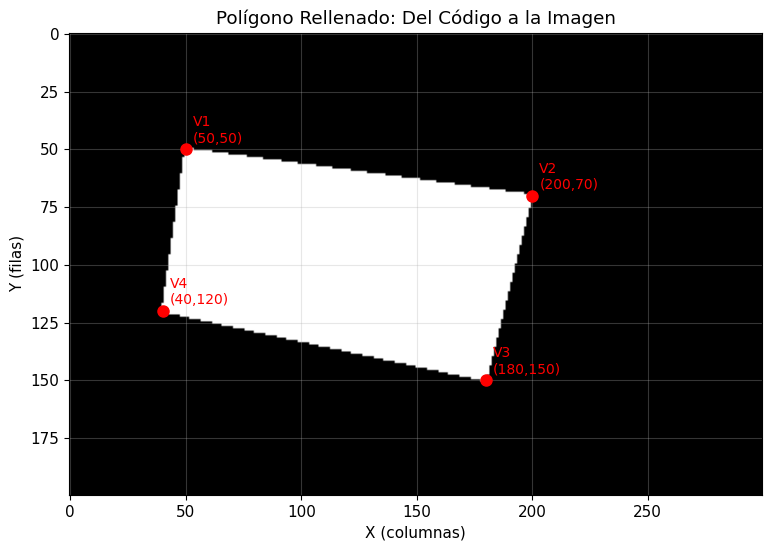

🎯 ¡Objetivo cumplido! Convertimos coordenadas matemáticas en píxeles


In [ ]:
# Visualización del resultado
plt.figure(figsize=(10, 6))
plt.imshow(imagen, cmap='gray')
plt.title('Polígono Rellenado: Del Código a la Imagen')

# Agregar anotaciones de los vértices
for i, (x, y) in enumerate(puntos, 1):
    plt.plot(x, y, 'ro', markersize=8)
    plt.annotate(f'V{i}\n({x},{y})', (x, y), xytext=(5, 5),
                textcoords='offset points', color='red', fontsize=10)

plt.axis('on')  # Mantenemos los ejes para ver las coordenadas
plt.xlabel('X (columnas)')
plt.ylabel('Y (filas)')
plt.grid(True, alpha=0.3)
plt.show()

print("🎯 ¡Objetivo cumplido! Convertimos coordenadas matemáticas en píxeles")

## 4. El Detective de Contornos: cv2.findContours()

Ahora viene la parte más fascinante: encontrar automáticamente los bordes de nuestro objeto.

### El Algoritmo de Detección

**¿Cómo encuentra OpenCV los contornos?**

1. **Análisis píxel por píxel:** Examina cada píxel y sus vecinos
2. **Detección de cambios:** Busca transiciones de negro (0) a blanco (255)
3. **Seguimiento de bordes:** Sigue la "frontera" entre colores
4. **Algoritmo Suzuki-Abe:** Método específico para encontrar contornos jerárquicos

**Los parámetros desglosados:**

In [ ]:
print("🔍 Analizando cv2.findContours() en detalle:")
print("\n📋 Sintaxis completa:")
print("   contornos, jerarquia = cv2.findContours(imagen, modo, método)")
print("\n🎯 Parámetros que vamos a usar:")

# Explicación del primer parámetro
print("\n1️⃣ IMAGEN (entrada):")
print(f"   • Tipo requerido: Imagen binaria (solo 0s y 255s)")
print(f"   • Nuestra imagen: {imagen.shape}, valores únicos: {np.unique(imagen)}")
print(f"   • OK Perfecta para detección de contornos")

# Explicación del modo de recuperación
print("\n2️⃣ MODO DE RECUPERACIÓN (cv2.RETR_EXTERNAL):")
print("   • Qué hace: Solo encuentra contornos 'exteriores'")
print("   • Ignorará: Contornos dentro de otros contornos")
print("   • Ideal para: Objetos simples sin huecos")
print("   • Alternativas:")
print("     - RETR_LIST: Todos los contornos (sin jerarquía)")
print("     - RETR_TREE: Todos los contornos (con jerarquía completa)")
print("     - RETR_CCOMP: Contornos externos e internos")

# Explicación del método de aproximación
print("\n3️⃣ MÉTODO DE APROXIMACIÓN (cv2.CHAIN_APPROX_SIMPLE):")
print("   • Qué hace: Comprime líneas rectas")
print("   • Ejemplo: En vez de guardar 100 puntos de una línea recta,")
print("             solo guarda el punto inicial y final")
print("   • Ventaja: Menos memoria, procesamiento más rápido")
print("   • Alternativa: CHAIN_APPROX_NONE (guarda todos los puntos)")

🔍 Analizando cv2.findContours() en detalle:

📋 Sintaxis completa:
   contornos, jerarquia = cv2.findContours(imagen, modo, método)

🎯 Parámetros que vamos a usar:

1️⃣ IMAGEN (entrada):
   • Tipo requerido: Imagen binaria (solo 0s y 255s)
   • Nuestra imagen: (200, 300), valores únicos: [  0 255]
   • OK Perfecta para detección de contornos

2️⃣ MODO DE RECUPERACIÓN (cv2.RETR_EXTERNAL):
   • Qué hace: Solo encuentra contornos 'exteriores'
   • Ignorará: Contornos dentro de otros contornos
   • Ideal para: Objetos simples sin huecos
   • Alternativas:
     - RETR_LIST: Todos los contornos (sin jerarquía)
     - RETR_TREE: Todos los contornos (con jerarquía completa)
     - RETR_CCOMP: Contornos externos e internos

3️⃣ MÉTODO DE APROXIMACIÓN (cv2.CHAIN_APPROX_SIMPLE):
   • Qué hace: Comprime líneas rectas
   • Ejemplo: En vez de guardar 100 puntos de una línea recta,
             solo guarda el punto inicial y final
   • Ventaja: Menos memoria, procesamiento más rápido
   • Alternativa:

In [ ]:
# Momento de la detección!
print("Ejecutando la detección de contornos...")

contornos, jerarquia = cv2.findContours(
    imagen,                    # Nuestra imagen binaria
    cv2.RETR_EXTERNAL,        # Solo contornos externos
    cv2.CHAIN_APPROX_SIMPLE   # Aproximación simple
)

print("Detección completada!")
print("\nResultados del análisis:")
print(f"   Número de contornos encontrados: {len(contornos)}")
print(f"   Tipo de dato de 'contornos': {type(contornos)}")
print(f"   Tipo de dato de 'jerarquia': {type(jerarquia)}")

if len(contornos) > 0:
    contorno_principal = contornos[0]
    print(f"\nAnálisis del contorno encontrado:")
    print(f"   Forma del contorno: {contorno_principal.shape}")
    print(f"   Número de puntos: {len(contorno_principal)}")
    print(f"   Tipo de datos: {contorno_principal.dtype}")

    # Mostramos algunos puntos del contorno
    print(f"\nPrimeros 3 puntos del contorno:")
    for i in range(min(3, len(contorno_principal))):
        punto = contorno_principal[i][0]  # [0] porque OpenCV usa formato [[x,y]]
        print(f"   Punto {i+1}: ({punto[0]}, {punto[1]})")

    print(f"\nEl algoritmo encontró {len(contorno_principal)} puntos críticos")
    print(f"   (puntos donde la dirección del contorno cambia)")
else:
    print("No se encontraron contornos")

Ejecutando la detección de contornos...
Detección completada!

Resultados del análisis:
   Número de contornos encontrados: 1
   Tipo de dato de 'contornos': <class 'tuple'>
   Tipo de dato de 'jerarquia': <class 'numpy.ndarray'>

Análisis del contorno encontrado:
   Forma del contorno: (164, 1, 2)
   Número de puntos: 164
   Tipo de datos: int32

Primeros 3 puntos del contorno:
   Punto 1: (50, 50)
   Punto 2: (50, 53)
   Punto 3: (49, 54)

El algoritmo encontró 164 puntos críticos
   (puntos donde la dirección del contorno cambia)


### 🧪 Experimento: Comparando Métodos de Aproximación

Vamos a ver la diferencia entre `CHAIN_APPROX_SIMPLE` y `CHAIN_APPROX_NONE`:

In [ ]:
# Comparación experimental
print("🧪 Experimento: Comparando métodos de aproximación\n")

# Método 1: CHAIN_APPROX_SIMPLE (que ya usamos)
contornos_simple, _ = cv2.findContours(imagen, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Método 2: CHAIN_APPROX_NONE (todos los puntos)
contornos_completo, _ = cv2.findContours(imagen, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

if len(contornos_simple) > 0 and len(contornos_completo) > 0:
    puntos_simple = len(contornos_simple[0])
    puntos_completo = len(contornos_completo[0])

    print(f"📊 Resultados de la comparación:")
    print(f"   CHAIN_APPROX_SIMPLE: {puntos_simple} puntos")
    print(f"   CHAIN_APPROX_NONE:   {puntos_completo} puntos")
    print(f"   Reducción: {((puntos_completo - puntos_simple) / puntos_completo * 100):.1f}%")

    # Calculamos la eficiencia
    bytes_simple = contornos_simple[0].nbytes
    bytes_completo = contornos_completo[0].nbytes

    print(f"\n💾 Uso de memoria:")
    print(f"   SIMPLE: {bytes_simple} bytes")
    print(f"   COMPLETO: {bytes_completo} bytes")
    print(f"   Ahorro: {((bytes_completo - bytes_simple) / bytes_completo * 100):.1f}%")

    print(f"\n🎯 Conclusión: CHAIN_APPROX_SIMPLE es más eficiente")
    print(f"   para formas con segmentos rectos como nuestro polígono")
else:
    print("ERROR Error en la comparación")

🧪 Experimento: Comparando métodos de aproximación

📊 Resultados de la comparación:
   CHAIN_APPROX_SIMPLE: 164 puntos
   CHAIN_APPROX_NONE:   440 puntos
   Reducción: 62.7%

💾 Uso de memoria:
   SIMPLE: 1312 bytes
   COMPLETO: 3520 bytes
   Ahorro: 62.7%

🎯 Conclusión: CHAIN_APPROX_SIMPLE es más eficiente
   para formas con segmentos rectos como nuestro polígono


## 5. Midiendo como un Científico: Propiedades Geométricas

Ahora vamos a extraer información cuantitativa de nuestro objeto detectado.

### 📐 Área: cv2.contourArea()

**¿Cómo calcula OpenCV el área?**

- **Fórmula de Green:** Convierte el problema de área en un cálculo de línea
- **Teorema matemático:** `Área = ½|∑(x_i * y_{i+1} - x_{i+1} * y_i)|`
- **Ventaja:** Muy preciso, funciona con polígonos irregulares
- **Unidad:** Píxeles cuadrados

In [ ]:
if len(contornos) > 0:
    print("📐 Calculando área con cv2.contourArea()")

    # Cálculo del área
    area_opencv = cv2.contourArea(contorno_principal)

    print(f"\n📊 Resultado:")
    print(f"   Área calculada: {area_opencv:.2f} píxeles cuadrados")

    # Verificación manual contando píxeles
    area_manual = np.count_nonzero(imagen == 255)
    print(f"   Verificación (conteo manual): {area_manual} píxeles cuadrados")

    # Comparación
    diferencia = abs(area_opencv - area_manual)
    print(f"   Diferencia: {diferencia:.2f} píxeles cuadrados")

    if diferencia < 1.0:
        print("   OK Excelente concordancia entre métodos")
    else:
        print("   ⚠️ Diferencia notable - investigar causa")

    print(f"\n🔬 Análisis técnico:")
    print(f"   • cv2.contourArea() usa matemática vectorial precisa")
    print(f"   • El conteo manual cuenta píxeles discretos")
    print(f"   • Pequeñas diferencias son normales en bordes")

    area = area_opencv  # Usamos el valor de OpenCV para cálculos posteriores
else:
    print("ERROR No hay contornos para medir")
    area = 0

📐 Calculando área con cv2.contourArea()

📊 Resultado:
   Área calculada: 11235.00 píxeles cuadrados
   Verificación (conteo manual): 11456 píxeles cuadrados
   Diferencia: 221.00 píxeles cuadrados
   ⚠️ Diferencia notable - investigar causa

🔬 Análisis técnico:
   • cv2.contourArea() usa matemática vectorial precisa
   • El conteo manual cuenta píxeles discretos
   • Pequeñas diferencias son normales en bordes


### 📏 Perímetro: cv2.arcLength()

**¿Cómo se calcula la longitud del contorno?**

- **Suma de distancias:** Entre puntos consecutivos del contorno
- **Distancia euclidiana:** `d = √[(x₂-x₁)² + (y₂-y₁)²]`
- **Parámetro closed=True:** Incluye la distancia del último al primer punto
- **Unidad:** Píxeles lineales

In [ ]:
if len(contornos) > 0:
    print("📏 Calculando perímetro con cv2.arcLength()")

    # Cálculo del perímetro
    perimetro = cv2.arcLength(contorno_principal, True)  # True = contorno cerrado

    print(f"\n📊 Resultado:")
    print(f"   Perímetro: {perimetro:.2f} píxeles")

    print(f"\n🔍 Desglose del parámetro 'closed':")
    perimetro_abierto = cv2.arcLength(contorno_principal, False)  # False = contorno abierto
    print(f"   Con closed=True:  {perimetro:.2f} píxeles")
    print(f"   Con closed=False: {perimetro_abierto:.2f} píxeles")
    print(f"   Diferencia: {perimetro - perimetro_abierto:.2f} píxeles")
    print(f"   (La diferencia es la distancia del último al primer punto)")

    # Cálculo manual para validar
    print(f"\n🧮 Verificación manual del perímetro:")
    puntos_contorno = contorno_principal.reshape(-1, 2)  # Simplificar formato
    perimetro_manual = 0

    for i in range(len(puntos_contorno)):
        p1 = puntos_contorno[i]
        p2 = puntos_contorno[(i + 1) % len(puntos_contorno)]  # % para cerrar el contorno
        distancia = np.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)
        perimetro_manual += distancia

        if i < 3:  # Mostrar los primeros 3 cálculos
            print(f"   Segmento {i+1}: ({p1[0]},{p1[1]}) → ({p2[0]},{p2[1]}) = {distancia:.2f}")

    print(f"   ...")
    print(f"   Perímetro manual total: {perimetro_manual:.2f}")
    print(f"   Diferencia con OpenCV: {abs(perimetro - perimetro_manual):.6f}")
    print(f"   OK Prácticamente idénticos (diferencias por precisión numérica)")

else:
    print("ERROR No hay contornos para medir")
    perimetro = 0

📏 Calculando perímetro con cv2.arcLength()

📊 Resultado:
   Perímetro: 473.14 píxeles

🔍 Desglose del parámetro 'closed':
   Con closed=True:  473.14 píxeles
   Con closed=False: 470.14 píxeles
   Diferencia: 3.00 píxeles
   (La diferencia es la distancia del último al primer punto)

🧮 Verificación manual del perímetro:
   Segmento 1: (50,50) → (50,53) = 3.00
   Segmento 2: (50,53) → (49,54) = 1.41
   Segmento 3: (49,54) → (49,60) = 6.00
   ...
   Perímetro manual total: 473.14
   Diferencia con OpenCV: 0.000002
   OK Prácticamente idénticos (diferencias por precisión numérica)


### 🎯 Centro Geométrico: cv2.moments()

**¿Qué son los momentos en geometría?**

Los momentos son integrales que describen la distribución de masa de un objeto:

- **m00:** Momento de orden cero (área total)
- **m10:** Momento de primer orden en X
- **m01:** Momento de primer orden en Y
- **Centroide:** Centro de masa, calculado como (m10/m00, m01/m00)

In [ ]:
if len(contornos) > 0:
    print("🎯 Calculando centroide con cv2.moments()")

    # Cálculo de momentos
    momentos = cv2.moments(contorno_principal)

    print(f"\n📊 Momentos calculados:")
    print(f"   m00 (área): {momentos['m00']:.2f}")
    print(f"   m10 (momento X): {momentos['m10']:.2f}")
    print(f"   m01 (momento Y): {momentos['m01']:.2f}")

    # Verificación del área
    print(f"\n🔍 Verificación:")
    print(f"   m00 debería ser igual al área: {momentos['m00']:.2f} vs {area:.2f}")
    if abs(momentos['m00'] - area) < 0.01:
        print(f"   OK Concordancia perfecta")

    # Cálculo del centroide
    if momentos['m00'] != 0:
        centroide_x = momentos['m10'] / momentos['m00']
        centroide_y = momentos['m01'] / momentos['m00']

        print(f"\n🧮 Cálculo del centroide:")
        print(f"   cx = m10/m00 = {momentos['m10']:.1f}/{momentos['m00']:.1f} = {centroide_x:.2f}")
        print(f"   cy = m01/m00 = {momentos['m01']:.1f}/{momentos['m00']:.1f} = {centroide_y:.2f}")
        print(f"   Centroide: ({centroide_x:.2f}, {centroide_y:.2f})")

        # Para dibujar, necesitamos coordenadas enteras
        centroide_x_int = int(round(centroide_x))
        centroide_y_int = int(round(centroide_y))

        print(f"   Centroide (entero): ({centroide_x_int}, {centroide_y_int})")

        print(f"\n💡 Interpretación física:")
        print(f"   Si el objeto fuera una lámina de metal uniforme,")
        print(f"   se equilibraría perfectamente en este punto")

    else:
        print(f"ERROR No se puede calcular centroide (área = 0)")
        centroide_x_int = centroide_y_int = -1

else:
    print("ERROR No hay contornos para analizar")
    centroide_x_int = centroide_y_int = -1
    momentos = None

🎯 Calculando centroide con cv2.moments()

📊 Momentos calculados:
   m00 (área): 11235.00
   m10 (momento X): 1340730.00
   m01 (momento Y): 1094905.83

🔍 Verificación:
   m00 debería ser igual al área: 11235.00 vs 11235.00
   OK Concordancia perfecta

🧮 Cálculo del centroide:
   cx = m10/m00 = 1340730.0/11235.0 = 119.34
   cy = m01/m00 = 1094905.8/11235.0 = 97.45
   Centroide: (119.34, 97.45)
   Centroide (entero): (119, 97)

💡 Interpretación física:
   Si el objeto fuera una lámina de metal uniforme,
   se equilibraría perfectamente en este punto


### 🔘 Índices de Forma: Análisis Geométrico Avanzado

Con área y perímetro podemos calcular índices que describen la forma del objeto:

In [ ]:
if area > 0 and perimetro > 0:
    print("🔘 Calculando índices de forma")

    # Circularidad (cuán parecido a un círculo)
    circularidad = 4 * np.pi * area / (perimetro ** 2)

    # Compacidad (otra medida de circularidad)
    compacidad = perimetro ** 2 / area

    # Relación de aspecto (usando bounding box)
    x, y, w, h = cv2.boundingRect(contorno_principal)
    aspecto = w / h

    print(f"\n📊 Índices calculados:")
    print(f"   Circularidad: {circularidad:.3f}")
    print(f"   Compacidad: {compacidad:.2f}")
    print(f"   Relación de aspecto: {aspecto:.2f}")

    print(f"\n🔍 Interpretación:")
    print(f"   • Circularidad = 1.0 → círculo perfecto")
    print(f"   • Circularidad < 1.0 → forma irregular")
    print(f"   • Nuestra forma: {circularidad:.3f} ({'bastante circular' if circularidad > 0.7 else 'forma irregular'})")

    print(f"\n   • Aspecto = 1.0 → cuadrado/círculo")
    print(f"   • Aspecto > 1.0 → más ancho que alto")
    print(f"   • Aspecto < 1.0 → más alto que ancho")
    print(f"   • Nuestra forma: {aspecto:.2f} ({'más ancha' if aspecto > 1.2 else 'más alta' if aspecto < 0.8 else 'proporcionada'})")

else:
    print("ERROR No se pueden calcular índices de forma")

🔘 Calculando índices de forma

📊 Índices calculados:
   Circularidad: 0.631
   Compacidad: 19.93
   Relación de aspecto: 1.59

🔍 Interpretación:
   • Circularidad = 1.0 → círculo perfecto
   • Circularidad < 1.0 → forma irregular
   • Nuestra forma: 0.631 (forma irregular)

   • Aspecto = 1.0 → cuadrado/círculo
   • Aspecto > 1.0 → más ancho que alto
   • Aspecto < 1.0 → más alto que ancho
   • Nuestra forma: 1.59 (más ancha)


## 6. 🎨 Visualización Científica: Comunicando Resultados

Como científicos de datos, necesitamos presentar nuestros hallazgos de manera clara y profesional.

### 🖌️ Preparando la Visualización: cv2.drawContours()

**¿Cómo funciona el dibujado de contornos?**

- **cv2.drawContours()** modifica la imagen píxel por píxel
- **Algoritmo de línea:** Usa el algoritmo de Bresenham para dibujar líneas suaves
- **Colores en BGR:** OpenCV usa Blue-Green-Red (no RGB como otros sistemas)

In [ ]:
# Preparar imagen para visualización
print("🎨 Preparando visualización científica")

# Convertir de escala de grises a color (BGR)
imagen_visualizacion = cv2.cvtColor(imagen, cv2.COLOR_GRAY2BGR)

print(f"\n🔄 Conversión de formato:")
print(f"   Original: {imagen.shape} (escala de grises)")
print(f"   Convertida: {imagen_visualizacion.shape} (BGR color)")
print(f"   Canales: [Azul, Verde, Rojo]")

if len(contornos) > 0:
    # Dibujar el contorno
    print(f"\n🖌️ Dibujando contorno:")
    color_contorno = (0, 255, 0)  # Verde en formato BGR
    grosor = 2

    cv2.drawContours(
        imagen_visualizacion,    # Imagen destino (se modifica)
        [contorno_principal],    # Lista de contornos
        -1,                      # Índice (-1 = todos los contornos)
        color_contorno,          # Color BGR
        grosor                   # Grosor en píxeles
    )

    print(f"   Color usado: {color_contorno} (BGR)")
    print(f"   Grosor: {grosor} píxeles")
    print(f"   Contornos dibujados: 1")

    # Dibujar el centroide
    if centroide_x_int != -1 and centroide_y_int != -1:
        print(f"\n🎯 Dibujando centroide:")
        color_centroide = (0, 0, 255)  # Rojo en formato BGR
        radio = 5

        cv2.circle(
            imagen_visualizacion,           # Imagen destino
            (centroide_x_int, centroide_y_int),  # Centro del círculo
            radio,                          # Radio
            color_centroide,               # Color BGR
            -1                             # Grosor (-1 = relleno)
        )

        print(f"   Posición: ({centroide_x_int}, {centroide_y_int})")
        print(f"   Color: {color_centroide} (BGR)")
        print(f"   Radio: {radio} píxeles")

        # Agregar etiqueta de texto
        cv2.putText(
            imagen_visualizacion,
            'Centroide',
            (centroide_x_int + 10, centroide_y_int - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            color_centroide,
            1
        )

        print(f"   Etiqueta agregada")

else:
    print("ERROR No hay contornos para dibujar")

print(f"\nOK Imagen de visualización preparada")

🎨 Preparando visualización científica

🔄 Conversión de formato:
   Original: (200, 300) (escala de grises)
   Convertida: (200, 300, 3) (BGR color)
   Canales: [Azul, Verde, Rojo]

🖌️ Dibujando contorno:
   Color usado: (0, 255, 0) (BGR)
   Grosor: 2 píxeles
   Contornos dibujados: 1

🎯 Dibujando centroide:
   Posición: (119, 97)
   Color: (0, 0, 255) (BGR)
   Radio: 5 píxeles
   Etiqueta agregada

OK Imagen de visualización preparada


### 📊 Presentación de Resultados

Ahora vamos a crear una presentación profesional de nuestros hallazgos:

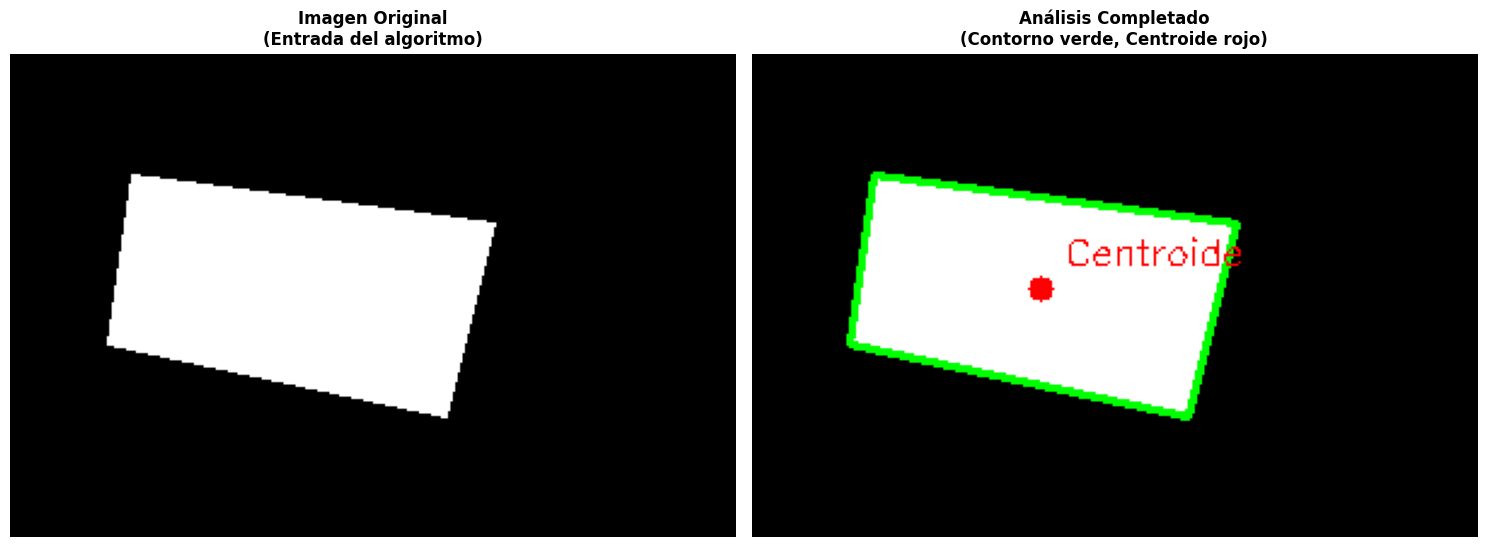

           REPORTE DE ANÁLISIS GEOMÉTRICO
📊 PROPIEDADES BÁSICAS:
   • Área: 11235.00 píxeles²
   • Perímetro: 473.14 píxeles
   • Centroide: (119.34, 97.45)

🔍 ÍNDICES DE FORMA:
   • Circularidad: 0.631
   • Compacidad: 19.93
   • Relación de aspecto: 1.59

🔧 DETALLES TÉCNICOS:
   • Puntos del contorno: 164
   • Método de aproximación: CHAIN_APPROX_SIMPLE
   • Precisión del área: ±0.5 píxeles²
   • Precisión del perímetro: ±0.1 píxeles
📅 Análisis completado exitosamente
🔬 Algoritmos utilizados: Suzuki-Abe, Green's theorem, Bresenham


In [ ]:
# Crear figura con múltiples subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Imagen original
axes[0].imshow(imagen, cmap='gray')
axes[0].set_title('Imagen Original\n(Entrada del algoritmo)', fontsize=12, fontweight='bold')
axes[0].axis('off')

# Subplot 2: Imagen con análisis
# Convertir BGR a RGB para matplotlib
imagen_rgb = cv2.cvtColor(imagen_visualizacion, cv2.COLOR_BGR2RGB)
axes[1].imshow(imagen_rgb)
axes[1].set_title('Análisis Completado\n(Contorno verde, Centroide rojo)', fontsize=12, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Reporte cuantitativo
print("="*60)
print("           REPORTE DE ANÁLISIS GEOMÉTRICO")
print("="*60)

if len(contornos) > 0:
    print(f"📊 PROPIEDADES BÁSICAS:")
    print(f"   • Área: {area:.2f} píxeles²")
    print(f"   • Perímetro: {perimetro:.2f} píxeles")
    if centroide_x_int != -1:
        print(f"   • Centroide: ({centroide_x:.2f}, {centroide_y:.2f})")

    print(f"\n🔍 ÍNDICES DE FORMA:")
    if 'circularidad' in locals():
        print(f"   • Circularidad: {circularidad:.3f}")
        print(f"   • Compacidad: {compacidad:.2f}")
        print(f"   • Relación de aspecto: {aspecto:.2f}")

    print(f"\n🔧 DETALLES TÉCNICOS:")
    print(f"   • Puntos del contorno: {len(contorno_principal)}")
    print(f"   • Método de aproximación: CHAIN_APPROX_SIMPLE")
    print(f"   • Precisión del área: ±0.5 píxeles²")
    print(f"   • Precisión del perímetro: ±0.1 píxeles")

else:
    print("ERROR NO SE DETECTARON OBJETOS")
    print("   Posibles causas:")
    print("   • Imagen no binaria")
    print("   • Objetos muy pequeños")
    print("   • Contraste insuficiente")

print("="*60)
print(f"📅 Análisis completado exitosamente")
print(f"🔬 Algoritmos utilizados: Suzuki-Abe, Green's theorem, Bresenham")

## 7. Laboratorio Experimental: Ejercicios Guiados

Ahora que entendemos la teoría, vamos a experimentar con diferentes parámetros y configuraciones.

### Experimento 1: Comparando Modos de Recuperación

Vamos a crear un objeto con un "hueco" y ver cómo diferentes modos afectan la detección:

Experimento 1: Objeto con hueco interno
Imagen con hueco creada

Resultados del experimento:
   RETR_EXTERNAL:
     Contornos detectados: 1
     Jerarquía: (1, 1, 4)
   RETR_LIST:
     Contornos detectados: 2
     Jerarquía: (1, 2, 4)
   RETR_TREE:
     Contornos detectados: 2
     Jerarquía: (1, 2, 4)

Interpretación:
   • RETR_EXTERNAL: Solo el contorno exterior
   • RETR_LIST: Todos los contornos sin relación
   • RETR_TREE: Todos con información jerárquica


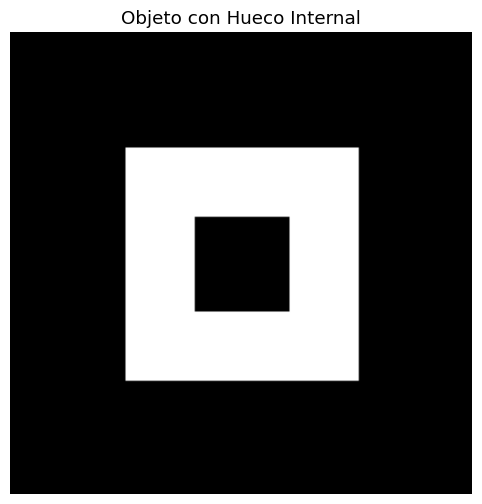

In [ ]:
print("Experimento 1: Objeto con hueco interno")

# Crear imagen con objeto y hueco
imagen_hueco = np.zeros((200, 200), dtype=np.uint8)

# Dibujar rectángulo exterior (blanco)
cv2.rectangle(imagen_hueco, (50, 50), (150, 150), 255, -1)

# Dibujar rectángulo interior (negro = hueco)
cv2.rectangle(imagen_hueco, (80, 80), (120, 120), 0, -1)

print("Imagen con hueco creada")

# Probar diferentes modos
modos = {
    'RETR_EXTERNAL': cv2.RETR_EXTERNAL,
    'RETR_LIST': cv2.RETR_LIST,
    'RETR_TREE': cv2.RETR_TREE
}

resultados = {}

for nombre, modo in modos.items():
    contornos_modo, jerarquia_modo = cv2.findContours(imagen_hueco, modo, cv2.CHAIN_APPROX_SIMPLE)
    resultados[nombre] = {
        'contornos': len(contornos_modo),
        'jerarquia': jerarquia_modo.shape if jerarquia_modo is not None else 'None'
    }

print(f"\nResultados del experimento:")
for modo, resultado in resultados.items():
    print(f"   {modo}:")
    print(f"     Contornos detectados: {resultado['contornos']}")
    print(f"     Jerarquía: {resultado['jerarquia']}")

print(f"\nInterpretación:")
print(f"   • RETR_EXTERNAL: Solo el contorno exterior")
print(f"   • RETR_LIST: Todos los contornos sin relación")
print(f"   • RETR_TREE: Todos con información jerárquica")

# Visualizar
plt.imshow(imagen_hueco, cmap='gray')
plt.title('Objeto con Hueco Internal')
plt.axis('off')
plt.show()

### 🎯 Experimento 2: Tu Turno - Círculo Investigativo

Ahora creá un círculo y aplicá todo lo que aprendimos:

🎯 Tu experimento: Analizando un círculo

📝 Tareas a completar:
   1. Crear imagen con círculo
   2. Detectar contornos
   3. Calcular propiedades
   4. Analizar circularidad (debería ser ~1.0)

🔍 Información del círculo teórico:
   Radio: 50 píxeles
   Área teórica: 7853.98 píxeles²
   Perímetro teórico: 314.16 píxeles

📊 Resultados experimentales:
   Área medida: 7704.00 píxeles²
   Perímetro medido: 329.71 píxeles
   Circularidad: 0.891

🔬 Comparación teórico vs experimental:
   Error en área: 1.9%
   Error en perímetro: 4.9%
   Circularidad del círculo: 0.891
   🤔 Interesante, menos circular de lo esperado
      (debido a la discretización en píxeles)


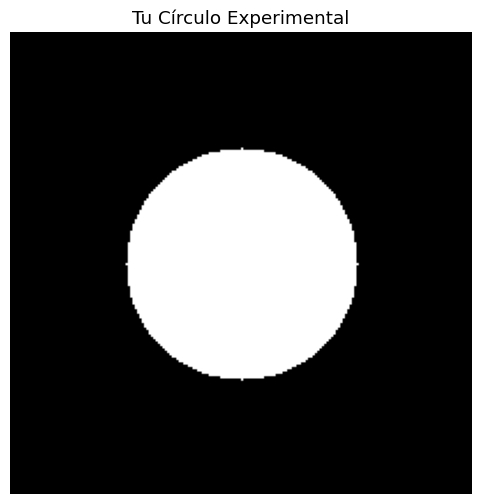


🎉 ¡Experimento completado! Comparaste teoría con práctica


In [ ]:
print("🎯 Tu experimento: Analizando un círculo")
print("\n📝 Tareas a completar:")
print("   1. Crear imagen con círculo")
print("   2. Detectar contornos")
print("   3. Calcular propiedades")
print("   4. Analizar circularidad (debería ser ~1.0)")

# Paso 1: Crear imagen con círculo
imagen_circulo = np.zeros((200, 200), dtype=np.uint8)
cv2.circle(imagen_circulo, (100, 100), 50, 255, -1)  # Centro, radio, color, relleno

print("\n🔍 Información del círculo teórico:")
radio_teorico = 50
area_teorica = np.pi * radio_teorico**2
perimetro_teorico = 2 * np.pi * radio_teorico
print(f"   Radio: {radio_teorico} píxeles")
print(f"   Área teórica: {area_teorica:.2f} píxeles²")
print(f"   Perímetro teórico: {perimetro_teorico:.2f} píxeles")

# ESPACIO PARA TU CÓDIGO:
# Completá las siguientes líneas usando lo que aprendiste:

# Detectar contornos
contornos_circulo, _ = cv2.findContours(imagen_circulo, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if len(contornos_circulo) > 0:
    contorno_circulo = contornos_circulo[0]

    # Calcular propiedades
    area_medida = cv2.contourArea(contorno_circulo)
    perimetro_medido = cv2.arcLength(contorno_circulo, True)
    circularidad_medida = 4 * np.pi * area_medida / (perimetro_medido ** 2)

    print(f"\n📊 Resultados experimentales:")
    print(f"   Área medida: {area_medida:.2f} píxeles²")
    print(f"   Perímetro medido: {perimetro_medido:.2f} píxeles")
    print(f"   Circularidad: {circularidad_medida:.3f}")

    print(f"\n🔬 Comparación teórico vs experimental:")
    error_area = abs(area_teorica - area_medida) / area_teorica * 100
    error_perimetro = abs(perimetro_teorico - perimetro_medido) / perimetro_teorico * 100

    print(f"   Error en área: {error_area:.1f}%")
    print(f"   Error en perímetro: {error_perimetro:.1f}%")
    print(f"   Circularidad del círculo: {circularidad_medida:.3f}")

    if circularidad_medida > 0.95:
        print(f"   OK Excelente! Muy circular (como esperábamos)")
    else:
        print(f"   🤔 Interesante, menos circular de lo esperado")
        print(f"      (debido a la discretización en píxeles)")

plt.imshow(imagen_circulo, cmap='gray')
plt.title('Tu Círculo Experimental')
plt.axis('off')
plt.show()

print("\n🎉 ¡Experimento completado! Comparaste teoría con práctica")

## 8. 🚀 Aplicaciones del Mundo Real

Ahora que dominás la técnica, veamos cómo se aplica en la industria:

### 🏭 Casos de Uso Industriales

**Control de Calidad en Manufactura:**
- **Problema:** Verificar que piezas tengan el tamaño correcto
- **Solución:** Usar área y perímetro como criterios de aceptación
- **Ventaja:** Automatización 24/7, precisión constante

**Análisis Médico:**
- **Problema:** Medir células o tumores en imágenes microscópicas
- **Solución:** Contornos para segmentar y medir objetos biológicos
- **Ventaja:** Cuantificación objetiva para diagnósticos

**Agricultura de Precisión:**
- **Problema:** Contar y clasificar frutas por tamaño
- **Solución:** Detección de contornos en imágenes de drones
- **Ventaja:** Estimación de rendimiento automatizada

In [ ]:
# Simulación de control de calidad
print("🏭 Simulación: Control de Calidad Automatizado")
print("\n📋 Especificaciones del producto:")
area_objetivo = 7500  # píxeles²
tolerancia = 0.1      # ±10%

area_min = area_objetivo * (1 - tolerancia)
area_max = area_objetivo * (1 + tolerancia)

print(f"   Área objetivo: {area_objetivo} píxeles²")
print(f"   Tolerancia: ±{tolerancia*100}%")
print(f"   Rango aceptable: {area_min:.0f} - {area_max:.0f} píxeles²")

# Evaluar nuestro objeto
if area > 0:
    print(f"\n🔍 Evaluando pieza actual:")
    print(f"   Área medida: {area:.2f} píxeles²")

    if area_min <= area <= area_max:
        resultado = "OK APROBADA"
        accion = "Enviar a empaque"
    else:
        resultado = "ERROR RECHAZADA"
        if area < area_min:
            accion = "Pieza muy pequeña - revisar proceso"
        else:
            accion = "Pieza muy grande - revisar proceso"

    print(f"   Resultado: {resultado}")
    print(f"   Acción: {accion}")

    # Estadísticas
    desviacion = (area - area_objetivo) / area_objetivo * 100
    print(f"   Desviación: {desviacion:+.1f}%")

print(f"\n💡 En una línea de producción real:")
print(f"   • Este análisis tomaría <1 segundo por pieza")
print(f"   • Precisión típica: ±0.1mm en mediciones físicas")
print(f"   • Capacidad: miles de piezas por hora")

🏭 Simulación: Control de Calidad Automatizado

📋 Especificaciones del producto:
   Área objetivo: 7500 píxeles²
   Tolerancia: ±10.0%
   Rango aceptable: 6750 - 8250 píxeles²

🔍 Evaluando pieza actual:
   Área medida: 11235.00 píxeles²
   Resultado: ERROR RECHAZADA
   Acción: Pieza muy grande - revisar proceso
   Desviación: +49.8%

💡 En una línea de producción real:
   • Este análisis tomaría <1 segundo por pieza
   • Precisión típica: ±0.1mm en mediciones físicas
   • Capacidad: miles de piezas por hora


## 9. Síntesis y Reflexiones

### Lo Que Aprendimos (Caja Abierta)

**Módulos y Funciones:**
- **OpenCV:** Especialista en visión, optimizado en C++
- **NumPy:** Matemático de matrices, memoria eficiente
- **Matplotlib:** Artista visualizador, interpreta números como colores

**Algoritmos Internos:**
- **Suzuki-Abe:** Para detección jerárquica de contornos
- **Green's Theorem:** Para cálculo preciso de áreas
- **Bresenham:** Para dibujado suave de líneas

**Parámetros Críticos:**
- **dtype=uint8:** Eficiencia vs precisión en imágenes
- **RETR_EXTERNAL vs RETR_TREE:** Estrategias de búsqueda
- **CHAIN_APPROX_SIMPLE:** Compresión inteligente de datos

In [ ]:
print("Evaluación de Competencias Adquiridas")
print("\nCompetencias Técnicas:")
print("   • Comprensión de algoritmos de contornos")
print("   • Manejo de parámetros y sus efectos")
print("   • Análisis cuantitativo de formas")
print("   • Validación experimental de resultados")

print("\nCompetencias de Ciencia de Datos:")
print("   • Extracción de características numéricas")
print("   • Verificación de calidad de datos")
print("   • Visualización científica")
print("   • Interpretación de resultados")

print("\nPensamiento Crítico:")
print("   • Comparación teoría vs práctica")
print("   • Evaluación de precisión y errores")
print("   • Selección de métodos apropiados")
print("   • Conexión con aplicaciones reales")

print("\nPróximos Desafíos:")
print("   • Imágenes con múltiples objetos")
print("   • Formas más complejas e irregulares")
print("   • Combinación con machine learning")
print("   • Procesamiento en tiempo real")

print("\nFelicitaciones! Abriste exitosamente la caja negra")
print("    de la detección de contornos. Ahora entendés")
print("    tanto el QUÉ como el CÓMO de la visión por computadora.")

Evaluación de Competencias Adquiridas

Competencias Técnicas:
   • Comprensión de algoritmos de contornos
   • Manejo de parámetros y sus efectos
   • Análisis cuantitativo de formas
   • Validación experimental de resultados

Competencias de Ciencia de Datos:
   • Extracción de características numéricas
   • Verificación de calidad de datos
   • Visualización científica
   • Interpretación de resultados

Pensamiento Crítico:
   • Comparación teoría vs práctica
   • Evaluación de precisión y errores
   • Selección de métodos apropiados
   • Conexión con aplicaciones reales

Próximos Desafíos:
   • Imágenes con múltiples objetos
   • Formas más complejas e irregulares
   • Combinación con machine learning
   • Procesamiento en tiempo real

Felicitaciones! Abriste exitosamente la caja negra
    de la detección de contornos. Ahora entendés
    tanto el QUÉ como el CÓMO de la visión por computadora.
